# Markov Chain Monte Carlo simulations

## BIOS 26211 winter 2022

## Name


In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Code example:  Metropolis-Hastings algorithm for a single 2-state ion channel

 Metropolis-Hastings function outline:
 
 * Inputs: list of states, initial state, vector array of target probabilities P, matrix of proposal probabilities Q (Q[i,j] is probability of generating candidate state i from current state j), number of simulation steps
* Initialize the vector of states X with the initital state
* Loop for number of steps
    * Generate a candidate state Y by drawing from the proposal distribution q[i,j] for current state X (use np.random.choice)
    * Draw a  random number v from uniform distribution between 0 and 1
         * if $v <= min(1,\frac{P[Y]*Q[X,Y]}{P[X]*Q[Y,X]})$ then set next value of X = Y 
         * else next value of X is the same as the current value
* Return the vector of states X

Simulate an ion channel that can switch between open and closed states with a number (e.g. 0) denoting the open state and another (e.g. 1)  denoting the closed state. Make the target fractions of open  and closed states changeable parameters, making sure they add up to 1 and define a vector P for the target distribution to be  P[0] = P[1] = 0.5. Define the matrix for the proposal distribution to be all Q[i,j] = 0.5 regardless of the states  i and j.  Run your simulation for 1000 time steps with initial state 0. Plot the states of the channel (0 and 1) over 1000 time steps and the histogram of the two states over this simulation. 

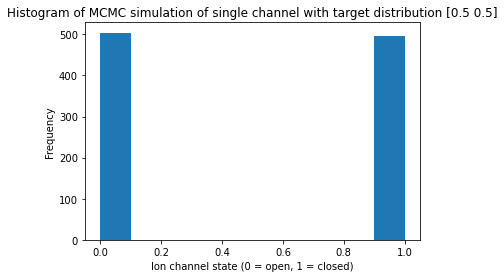

In [2]:
def single_channel(list_states, init_state, target_prob, proposal_mat, num_steps):
    states_vec = np.repeat(init_state, repeats=num_steps + 1)
    for i in np.arange(num_steps):
        old = states_vec[i]
        new = np.random.choice(list_states, 1, p = proposal_mat[:,old])
        acceptance_prob = min(1, target_prob[new]*proposal_mat[old,new]/(target_prob[old]*proposal_mat[new,old]))
        if (np.random.random(1) < acceptance_prob):
            states_vec[i+1] = new
        else:
            states_vec[i+1] = old
    return(states_vec)

list_states = np.array([0,  1])
init_state = 0
target_prob =  np.array([0.5, 0.5])
proposal_mat = np.array([[0.5, 0.5],  [0.5, 0.5] ])
num_steps = 1000
sample_states = single_channel(list_states, init_state, target_prob, proposal_mat, num_steps)
plt.hist(sample_states)
plt.xlabel('Ion channel state (0 = open, 1 = closed)')
plt.ylabel('Frequency')
plt.title('Histogram of MCMC simulation of single channel with target distribution ' + str(target_prob))
plt.show()

Repeat the simulation with the target distribution of P[0] = 0.1; P[1] = 0.9 and plot the states of the channel over 1000 time steps and the histogram of the two states over this simulation.  

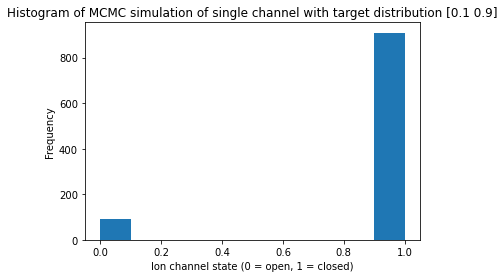

In [4]:
list_states = np.array([0,  1])
init_state = 0
target_prob =  np.array([0.1, 0.9])
proposal_mat = np.array([[0.5, 0.5],  [0.5, 0.5] ])
num_steps = 1000
sample_states = single_channel(list_states, init_state, target_prob, proposal_mat, num_steps)
plt.hist(sample_states)
plt.xlabel('Ion channel state (0 = open, 1 = closed)')
plt.ylabel('Frequency')
plt.title('Histogram of MCMC simulation of single channel with target distribution ' + str(target_prob))
plt.show()

Change the proposal distribution so that Q[0,1] = 0.99 and Q[0,0] = 0.99 (i.e., the probability of proposing the open state is always 0.99) and  report if you see a difference in the simulation for both of the two target distributions.

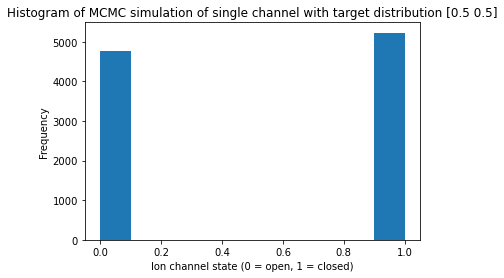

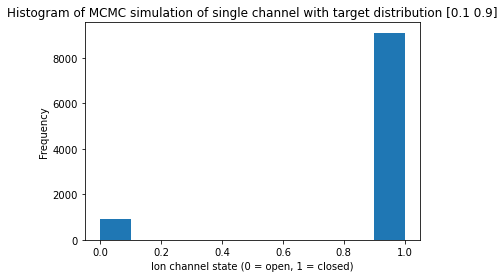

In [8]:
list_states = np.array([0,  1])
init_state = 0
target_prob =  np.array([0.5, 0.5])
proposal_mat = np.array([[0.99, 0.99],  [0.01, 0.01] ])
num_steps = 10000
sample_states = single_channel(list_states, init_state, target_prob, proposal_mat, num_steps)
plt.hist(sample_states)
plt.xlabel('Ion channel state (0 = open, 1 = closed)')
plt.ylabel('Frequency')
plt.title('Histogram of MCMC simulation of single channel with target distribution ' + str(target_prob))
plt.show()


list_states = np.array([0,  1])
init_state = 0
target_prob =  np.array([0.1, 0.9])
proposal_mat = np.array([[0.99, 0.99],  [0.01, 0.01] ])
num_steps = 10000
sample_states = single_channel(list_states, init_state, target_prob, proposal_mat, num_steps)
plt.hist(sample_states)
plt.xlabel('Ion channel state (0 = open, 1 = closed)')
plt.ylabel('Frequency')
plt.title('Histogram of MCMC simulation of single channel with target distribution ' + str(target_prob))
plt.show()

##  Part 1: Multiple independent ion channels

For this section, always use the parameters: P[0] = 0.2 and Q[i,j] = 0.5 

Modify your function to simulate a number of ion channels, with each channel opening and closing independently. Save the total number of open and closed channels at each time step into a vector. Here is the new function outline:

* INPUTS: list of states, initial state, number of ion channels, vector array of target probabilities P, matrix of proposal probabilities Q (Q[i,j] is probability of generating candidate state i from current state j), number of simulation steps
* DO:
    * Initialize the matrix of states X with the initital state (with rows representing time steps and columns representing different channels)
    * Loop for number of steps
        * loop for number of ion channels
            * Generate a candidate state Y by drawing from the proposal distribution Q[i,j] for current state X (use np.random.choice)
            * Draw a random number v from uniform distribution between 0 and 1
                 * if $v <= min(1,\frac{P[Y]*Q[X,Y]}{P[X]*Q[Y,X]})$ then set next value of X = Y 
                 * else next value of X is the same as the current value
        * calculate the total number of open ion channels
* RETURN: vector of number of open ion channels

### 1.1 
Run the simulation for different values of M: 2, 10, 100 for 200 time steps and report the mean number of open channels and the variance for each of the three cases. Is this what you expected? 

### 1.2 
Now run the multiple channel simulations for M=2, 10, 100 for 200 time steps 100 times (put a for loop around the previous code), assign the number of open channels to a matrix (with rows being time points and columns being different simulations) and plot the histograms of the number of channels at several different time points (t=1, t=100, t=200). Do they resemble any probability distribution you know? 

### 1.3 
We would like to estimate the burn-in time for converging to the stationary distribution. To do this, run 100 simulation as above for 2, 10, and 100 channels, and plot the mean number of open channels over time for each.  Report by eye how quickly this number converges to the equilibrium (expected) mean value of open channels. Change the proposal distribution from Q[i,j] = 0.5 to Q[0,1] = 0.99 and Q[0,0] = 0.99 and report what effect this has on convergence of the mean number of open channels. Experiment with the proposal distribution and postulate a hypothesis about the relationship between the proposal distribution and burn-in time.

##  Part 2: 2 correlated ion channels

Now let us investigate the situation when the probability of opening and  closing of a channel depends on the state of its neighbor. Calculate the conditional probabilities for states of one channel given the state of its neighbor based on the joint distribution and use the Gibbs algorithm
to compute a random sample. The Gibbs sampler does not accept or reject proposed states, but instead uses conditional probabilities to generate new states of the two random variables X1 and X2 (the two ion channels): 

Gibbs Sampler function outline:
* INPUTS: list of states, initial state, matrix of conditional probabilities C ($C[i,j]$ is the probability of one ion being in state i, given that the other ion channel is in state j), number of simulation steps
*  DO: 
     * Use initial state to initialize X1 and generate the first value of X2 from the conditional distribution $C[i,X1]$ (use `np.random.choice`)
     * Loop for number of steps
         -  Choose next value of X1 from $C[i, X2]$ (use `np.random.choice`)
         - Choose next value of X2 from $C[i, X1]$ (use `np.random.choice`)
* RETURN: Matrix array of states, two values for each time step

### 2.1 
Let the target joint probability distribution be: $P[0,0] = 0.3; P[1,1] = 0.3; P[0,1] = P[1,0] = 0.2$ (where $P[i,j]$ represents the probability of ion channel 1 being in state i AND ion channel 2 being in state j.) 

1. Calculate the implied conditional probabilities for this joint distribution (the matrix $C[i,j]$
2. Implement the Gibbs simulation algorithm for two ion channels in a function and use it to run a simulation with initial state 0 for 1000 steps. 
3. Plot the histograms for number of open channels for the first 100 time steps and for the second 100 time steps. 

How different are they? Plot the histogram for 201 through 1000 time steps, and compare with the first two. Approximately how long does it take for the histrograms to converge?

### 2.2
3.2 Let the target joint probability distribution be $P[0,0] = 0.6; P[1,1] = 0.2; P[0,1] = P[1,0] = 0.1$. 

Calculate the implied conditional probabilities for this joint distribution, and use them to run the function with initial state 0 for 1000 steps. Plot the histograms for the number of open channels for the first 100 time steps and for the second 100 time steps. How different are they? Plot the histogram for 201 through 1000 time steps, and compare with the first two. Approximately how long does it take for the histrograms to converge? Comment on the effect of the conditional probabilites between channels on the rate of convergence of the distribution of open channels.

##  Part 3: Multiple correlated ion channels

Now we will use the Gibbs Sampler to simulate ion channel switching in the case that there are multiple correlated ion channels arranged in a linear array. The state of each ion channel depends on its two nearest neighbors, with conditional probabilities, with ON representing the number of neighbors in the open state. For example:

$$C[0|ON=2] = 0.4; \; C[0|ON=1] = 0.2; \; C[0 |ON=0] = 0.1$$

For the two boundaries of the ion channel array, the state of each ion channel can only depend on one nearest neighbor:

$$B[0|ON=1] = 0.2; \; B[0|ON=0] = 0.1$$

Gibbs Sampler with Multiple Correlated Channels function outline:

* INPUTS: list of states, initial state distribution, number of ion channels, matrix of conditional probabilities C ($C[i,j]$ is the probability of ion channel being in state i, given the number of open neighboring channels j, matrix of conditional probabilities for the boundaries B ($B[i,j]$ is the probability of boundary ion channel being in state i, given the number of open neighboring channels), number of simulation steps
*  DO: 
    * Initialize array of states, with columns being different channels and rows being different time steps
    * Generate first states of each channel using the initial state distribution (use `np.random.choice`)
    * Loop for number of steps
        * Choose the first boundary ion channel from B, given the number of open neighbors
        * Loop through each ion channel
            *  Choose the next value of X[k] from C, given the number of open neighbors
            * Choose the last bundary ion channel from B
* RETURN: matrix of states X with shape (number of channels, number of steps +1)


### 3.1 
Using the conditional distributions given above, run the MCMC for 100 ion channels over 10000 steps and plot the histogram for the number of channels being open over all except for the first 100 time steps and report the mean and variance of this sample, then compare the histograms and their mean and variance to the samples produced from uncorrelated ion channels in Part 2. 

### 3.2 
Change the conditional probabilities to:
$$C[0|ON=2] = 0.2; \; C[0|ON=1] = 0.5; \; C[0 |ON=0] = 0.7$$

For the two boundaries of the ion channel array: 
$$ B [0|ON=1] = 0.1; \; B[0|ON=0] = 0.4$$

Using the conditional distributions given above, run the MCMC for 100 ion channels over 10000 steps and plot the histogram for the number of channels being open over all except for the first 100 time steps and report the mean and variance of this sample. Compare this  histogram and the mean and variance to the one you obtained in 3.1 and to the samples produced from uncorrelated ion channels in Part 2. 